Problem statement

A training institute which conducts training for analytics/ data science wants to expand their business to manpower recruitment (data science only) as well. 
 
Company gets large number of signups for their trainings. Now, company wants to connect these enrollees with their clients who are looking to hire employees working in the same domain. Before that, it is important to know which of these candidates are really looking for a new employment. They have student information related to demographics, education, experience and features related to training as well.
 
To understand the factors that lead a person to look for a job change, the agency wants you to design a model that uses the current credentials/demographics/experience to predict the probability of an enrollee to look for a new job.

Import libraries

In [17]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Import and read files

In [18]:
#read files
#Reading train file:
train = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/HR-Analytics-Job-Change/master/train_jqd04QH%20-%20train_jqd04QH.csv')
#Reading test file:
test = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/HR-Analytics-Job-Change/master/test_KaymcHn%20-%20test_KaymcHn.csv')
#Reading sample submission file:
sample_sub = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/HR-Analytics-Job-Change/master/sample_submission_sxfcbdx%20-%20sample_submission_sxfcbdx.csv')

In [19]:
train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18354,25366,city_103,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,5,<10,Pvt Ltd,1,71,0
18355,25545,city_160,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,15,50-99,Pvt Ltd,1,160,0
18356,11514,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,11,50-99,Pvt Ltd,3,18,0
18357,1689,city_75,0.939,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10/49,Pvt Ltd,3,41,0


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [21]:
test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15016,11308,city_46,0.762,NaN,Has relevent experience,no_enrollment,Masters,STEM,>20,500-999,Pvt Ltd,>4,68
15017,14612,city_21,0.624,Male,Has relevent experience,Full time course,Masters,STEM,4,1000-4999,Pvt Ltd,1,320
15018,33346,city_16,0.910,Male,Has relevent experience,no_enrollment,High School,NaN,9,1000-4999,Pvt Ltd,4,13
15019,14506,city_64,0.666,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,1,38


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15021 entries, 0 to 15020
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             15021 non-null  int64  
 1   city                    15021 non-null  object 
 2   city_development_index  15021 non-null  float64
 3   gender                  11633 non-null  object 
 4   relevent_experience     15021 non-null  object 
 5   enrolled_university     14742 non-null  object 
 6   education_level         14626 non-null  object 
 7   major_discipline        12628 non-null  object 
 8   experience              14977 non-null  object 
 9   company_size            10970 non-null  object 
 10  company_type            10691 non-null  object 
 11  last_new_job            14717 non-null  object 
 12  training_hours          15021 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.5+ MB


Check for null values and impute

In [23]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [24]:
test.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    3388
relevent_experience          0
enrolled_university        279
education_level            395
major_discipline          2393
experience                  44
company_size              4051
company_type              4330
last_new_job               304
training_hours               0
dtype: int64

Impute missing values

In [25]:
#replace columns with mode
for column in train.columns:
    train[column].fillna(train[column].mode()[0], inplace=True)

for column in test.columns:
    test[column].fillna(test[column].mode()[0], inplace=True)

In [26]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

Convert object to numeric

In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train.city = le.fit_transform(train.city)
train.gender = le.fit_transform(train.gender)
train.relevent_experience = le.fit_transform(train.relevent_experience)
train.enrolled_university = le.fit_transform(train.enrolled_university)
train.education_level = le.fit_transform(train.education_level)
train.major_discipline = le.fit_transform(train.major_discipline)
train.experience = le.fit_transform(train.experience)
train.company_size = le.fit_transform(train.company_size)
train.company_type = le.fit_transform(train.company_type)
train.last_new_job = le.fit_transform(train.last_new_job)

test.city = le.fit_transform(test.city)
test.gender = le.fit_transform(test.gender)
test.relevent_experience = le.fit_transform(test.relevent_experience)
test.enrolled_university = le.fit_transform(test.enrolled_university)
test.education_level = le.fit_transform(test.education_level)
test.major_discipline = le.fit_transform(test.major_discipline)
test.experience = le.fit_transform(test.experience)
test.company_size = le.fit_transform(test.company_size)
test.company_type = le.fit_transform(test.company_type)
test.last_new_job = le.fit_transform(test.last_new_job)

Graphically represent data

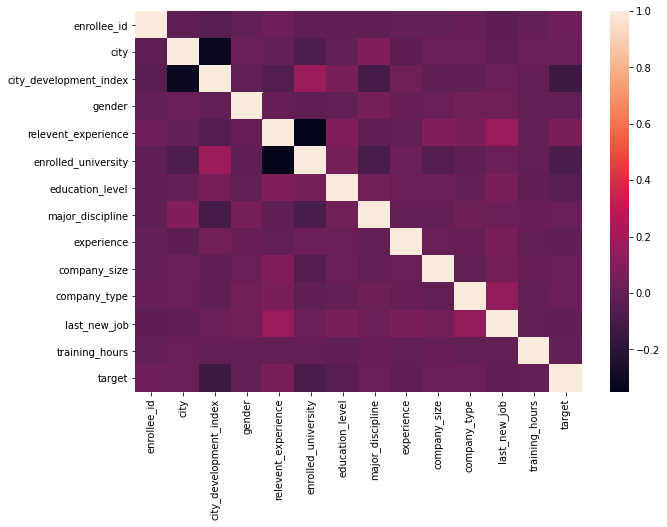

In [28]:
#create a heatmap to correlate promotion
plt.figure(figsize=(10,7))
cmap=train.corr()
sns.heatmap(cmap)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


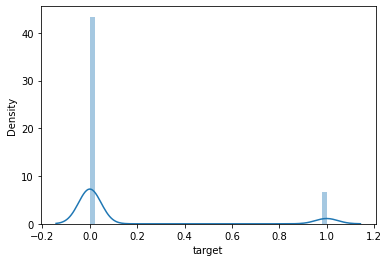

In [29]:
sns.distplot(train['target'])

Count those looking for a job change

In [30]:
from collections import Counter

print(Counter(train.target))

Counter({0: 15934, 1: 2425})


Get percentage of those looking to change jobs

In [31]:
train.target.value_counts(normalize=True) * 100

0    86.79122
1    13.20878
Name: target, dtype: float64

Define X, y and X_test

In [32]:
y = train["target"]
X = train.drop(['enrollee_id', 'target'], axis=1)
X_test = test.drop(['enrollee_id'], axis=1)

Split train set for training and validation

In [33]:
#split training set for training and testing
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.10, stratify=y, shuffle=True)
#check shapes of testing data
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((16523, 12), (1836, 12), (16523,), (1836,))

Scaler

In [34]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train = scaler.transform(X_train)
# Scale the validation set
X_val = scaler.transform(X_val)
# Scale the test set
X_test = scaler.transform(X_test)

Class weights

In [35]:
from sklearn.utils import class_weight

class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced',np.unique(y_train), y_train)))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


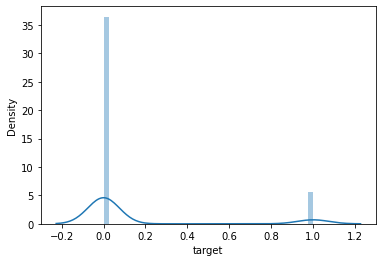

In [36]:
sns.distplot(y_val)

In [37]:
print(Counter(y_val))

Counter({0: 1593, 1: 243})


In [38]:
y_val.value_counts(normalize=True) * 100

0    86.764706
1    13.235294
Name: target, dtype: float64

Build model

In [39]:
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
!pip install catboost
from catboost import CatBoostClassifier


models = []
models.append(('DC',DummyClassifier(strategy='stratified', random_state=1)))
models.append(('ADA',AdaBoostClassifier(n_estimators=2000, random_state=1)))
models.append(('BC', BaggingClassifier(random_state=1)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('XGB', XGBClassifier(learning_rate=0.01, n_estimators=2000, max_depth=5, min_child_weight=10, 
                      gamma=0.4,nthread=4, subsample=0.8, colsample_bytree=0.8, 
                      objective= 'binary:logistic',scale_pos_weight=3,seed=29, class_weight=class_weights)))
models.append(('HGB', HistGradientBoostingClassifier(max_iter=2000)))
models.append(('MLP', MLPClassifier(max_iter=2000, random_state=1)))
models.append(('CAT', CatBoostClassifier(random_state=1, class_weights=class_weights)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

Streaming output truncated to the last 5000 lines.
6:	learn: 0.6820514	total: 81.7ms	remaining: 11.6s
7:	learn: 0.6805510	total: 93.1ms	remaining: 11.5s
8:	learn: 0.6792103	total: 104ms	remaining: 11.5s
9:	learn: 0.6784505	total: 110ms	remaining: 10.9s
10:	learn: 0.6771495	total: 121ms	remaining: 10.9s
11:	learn: 0.6759501	total: 131ms	remaining: 10.8s
12:	learn: 0.6750597	total: 141ms	remaining: 10.7s
13:	learn: 0.6741632	total: 151ms	remaining: 10.6s
14:	learn: 0.6731019	total: 161ms	remaining: 10.6s
15:	learn: 0.6722847	total: 172ms	remaining: 10.6s
16:	learn: 0.6713355	total: 182ms	remaining: 10.5s
17:	learn: 0.6705311	total: 193ms	remaining: 10.5s
18:	learn: 0.6696971	total: 203ms	remaining: 10.5s
19:	learn: 0.6689398	total: 214ms	remaining: 10.5s
20:	learn: 0.6682849	total: 228ms	remaining: 10.6s
21:	learn: 0.6676651	total: 237ms	remaining: 10.6s
22:	learn: 0.6669827	total: 248ms	remaining: 10.5s
23:	learn: 0.6663548	total: 260ms	remaining: 10.6s
24:	learn: 0.6656312	total: 273ms

Graphically compare models

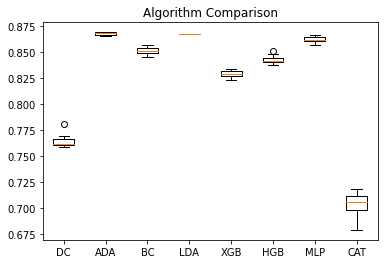

In [40]:
# Compare 
from matplotlib.pyplot import *

matplotlib.pyplot.boxplot(results, labels=names)
matplotlib.pyplot.title('Algorithm Comparison')
matplotlib.pyplot.show()

Predict on selected model

In [75]:
# Make predictions on validation dataset
model = XGBClassifier(learning_rate=0.01, n_estimators=2000, max_depth=5, min_child_weight=10, 
                      gamma=0.4,nthread=4, subsample=0.8, colsample_bytree=0.8, 
                      objective= 'binary:logistic',scale_pos_weight=3,seed=29, class_weight=class_weights).fit(X_train,y_train)
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.8316993464052288


In [76]:
print(Counter(y_pred))

Counter({0: 1690, 1: 146})


In [77]:
y_pred.sum()/len(y_pred)*100

7.952069716775599

In [78]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_val, y_pred))

0.5490339680546836


In [79]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

#y_test as first argument and the preds as second argument 
confusion_matrix(y_val, y_pred)

array([[1487,  106],
       [ 203,   40]])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


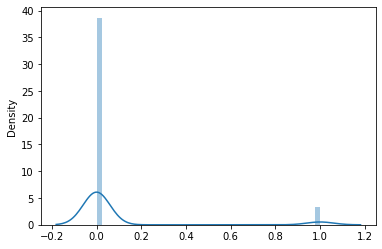

In [80]:
sns.distplot(y_pred)

In [81]:
prediction = model.predict(X_test)
prediction

array([1, 0, 1, ..., 0, 0, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


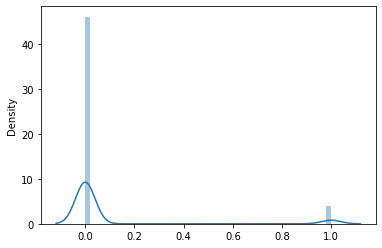

In [82]:
sns.distplot(prediction)

In [83]:
print(Counter(prediction))

Counter({0: 13820, 1: 1201})


In [84]:
prediction.sum()/len(prediction)*100

7.995473004460423

Predict probability on test set

In [85]:
probability = model.predict_proba(X_test)[:,1]
probability

array([0.68650526, 0.22827637, 0.58221793, ..., 0.2307314 , 0.3622712 ,
       0.5737122 ], dtype=float32)

Prepare submission

In [86]:
output = pd.DataFrame({'enrollee_id': test.enrollee_id, 'target': probability})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [87]:
#upload submission
my_submission = pd.read_csv("my_submission.csv")
my_submission

,enrollee_id,target
0,16548,0.686505
1,12036,0.228276
2,11061,0.582218
3,5032,0.189601
4,17599,0.179859
...,...,...
15016,11308,0.150177
15017,14612,0.600360
15018,33346,0.230731
15019,14506,0.362271
